# Exercise - 10
Use t-SNE to reduce the first 5,000 images of the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image's target class. Alternatively, you can replace each dot in the scatterplot with the corresponding instance’s class (a digit from 0 to 9), or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits. Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from matplotlib.axes import Axes
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
from sklearn.utils import Bunch
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding, MDS, Isomap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
mnist: Bunch = fetch_openml('mnist_784', as_frame= False, parser= 'auto')
X, y = mnist['data'][:5000], mnist['target'][:5000]

In [3]:
tsne = TSNE(init= 'random', random_state= 42)
%time X_reduced: np.ndarray = tsne.fit_transform(X)

CPU times: user 1min 43s, sys: 174 ms, total: 1min 43s
Wall time: 28.1 s


## Plotting the reduced dataset

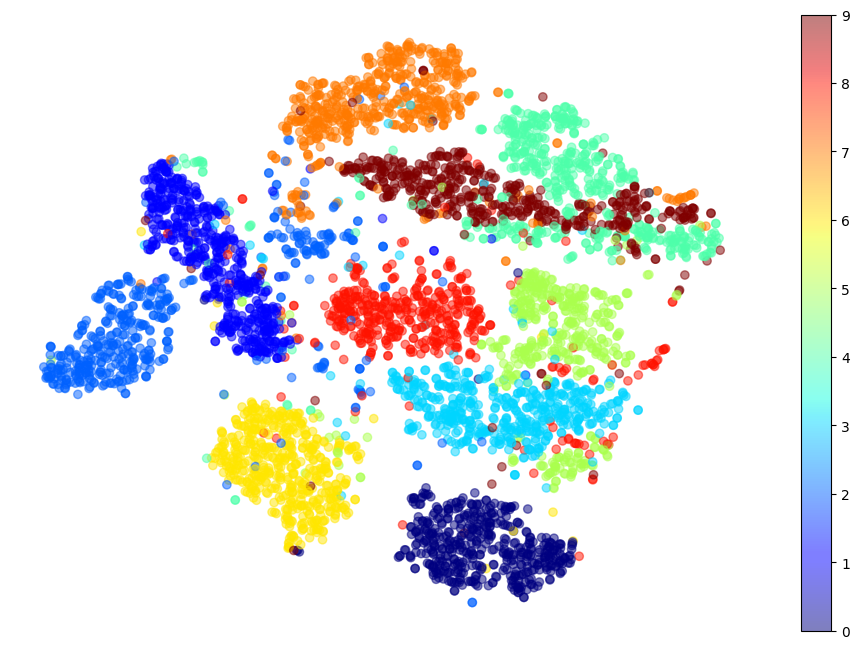

In [4]:
plt.figure(figsize= (12, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c= y.astype('uint8'), cmap= 'jet', alpha= 0.5)
plt.axis('off')
plt.colorbar()
plt.show()

9 and 4, 5 and 3 both are colliding with each other so lets plot 9 and 4 separately.

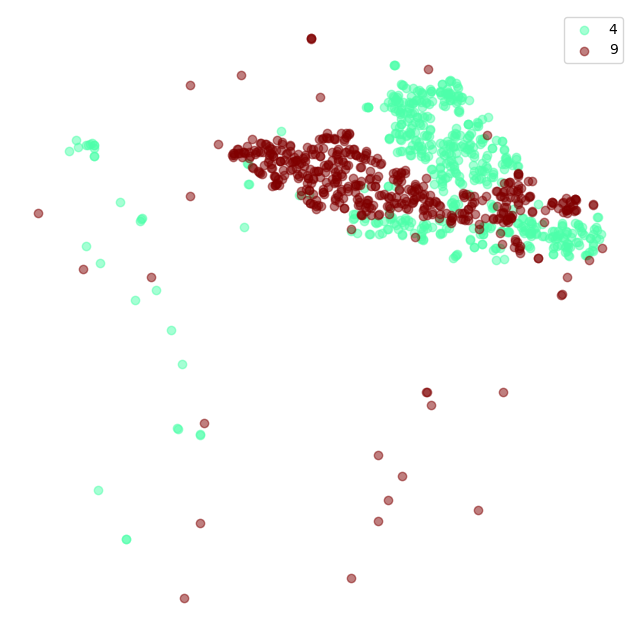

In [5]:
plt.figure(figsize= (8, 8))
for digit in ('4', '9'):
    plt.scatter(
        X_reduced[y == digit, 0], 
        X_reduced[y == digit, 1], 
        c= [plt.cm.jet(int(digit) / 9)], 
        alpha= 0.5, 
        label= digit
    )
plt.axis('off')
plt.legend()
plt.show()

Let's run t-SNE on only these two digits.

In [6]:
index: np.ndarray = (y == '4') | (y == '9')
X_subset: np.ndarray = X[index]
y_subset: np.ndarray = y[index]

In [7]:
tsne_subset = TSNE(init= 'random', random_state= 42)
X_subset_reduced: np.ndarray = tsne_subset.fit_transform(X_subset)

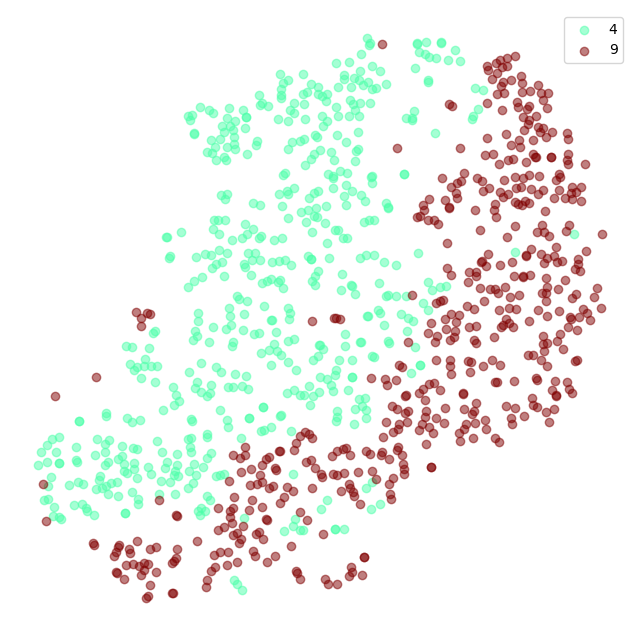

In [8]:
plt.figure(figsize= (8, 8))
for digit in ('4', '9'):
    plt.scatter(
        X_subset_reduced[y_subset == digit, 0], 
        X_subset_reduced[y_subset == digit, 1], 
        c= [plt.cm.jet(int(digit) / 9)], 
        alpha= 0.5, 
        label= digit
    )
plt.axis('off')
plt.legend()
plt.show()

## Some amazing visualization

In [48]:
def plot_digits(
    X: np.ndarray,
    y: np.ndarray,
    images: np.ndarray,
    *,
    min_distance: float = 0.04,
    figsize: tuple[int, int] = (13, 10)
) -> None:
    """
    TODO
    """
    X_normalized: np.ndarray = MinMaxScaler().fit_transform(X)
    neighbors: np.ndarray = np.array([[10., 10.]], dtype= 'float32')
    
    plt.figure(figsize= figsize)
    plt.scatter(
        X_normalized[:, 0], 
        X_normalized[:, 1], 
        c= y.astype('uint8'), 
        cmap= 'jet', 
        alpha= 0.5
    )
    plt.axis('off')
    ax: Axes = plt.gca()
    
    for index in range(X_normalized.shape[0]):
        image_coord: np.ndarray = X_normalized[[index]]
        closest_distance: float = np.linalg.norm(neighbors - image_coord, axis= 1).min()
        
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, image_coord]
            image_box = AnnotationBbox(
                offsetbox= OffsetImage(images[index].reshape(28, 28), cmap= 'binary'),
                xy= image_coord[0]
            )
            
            ax.add_artist(image_box)

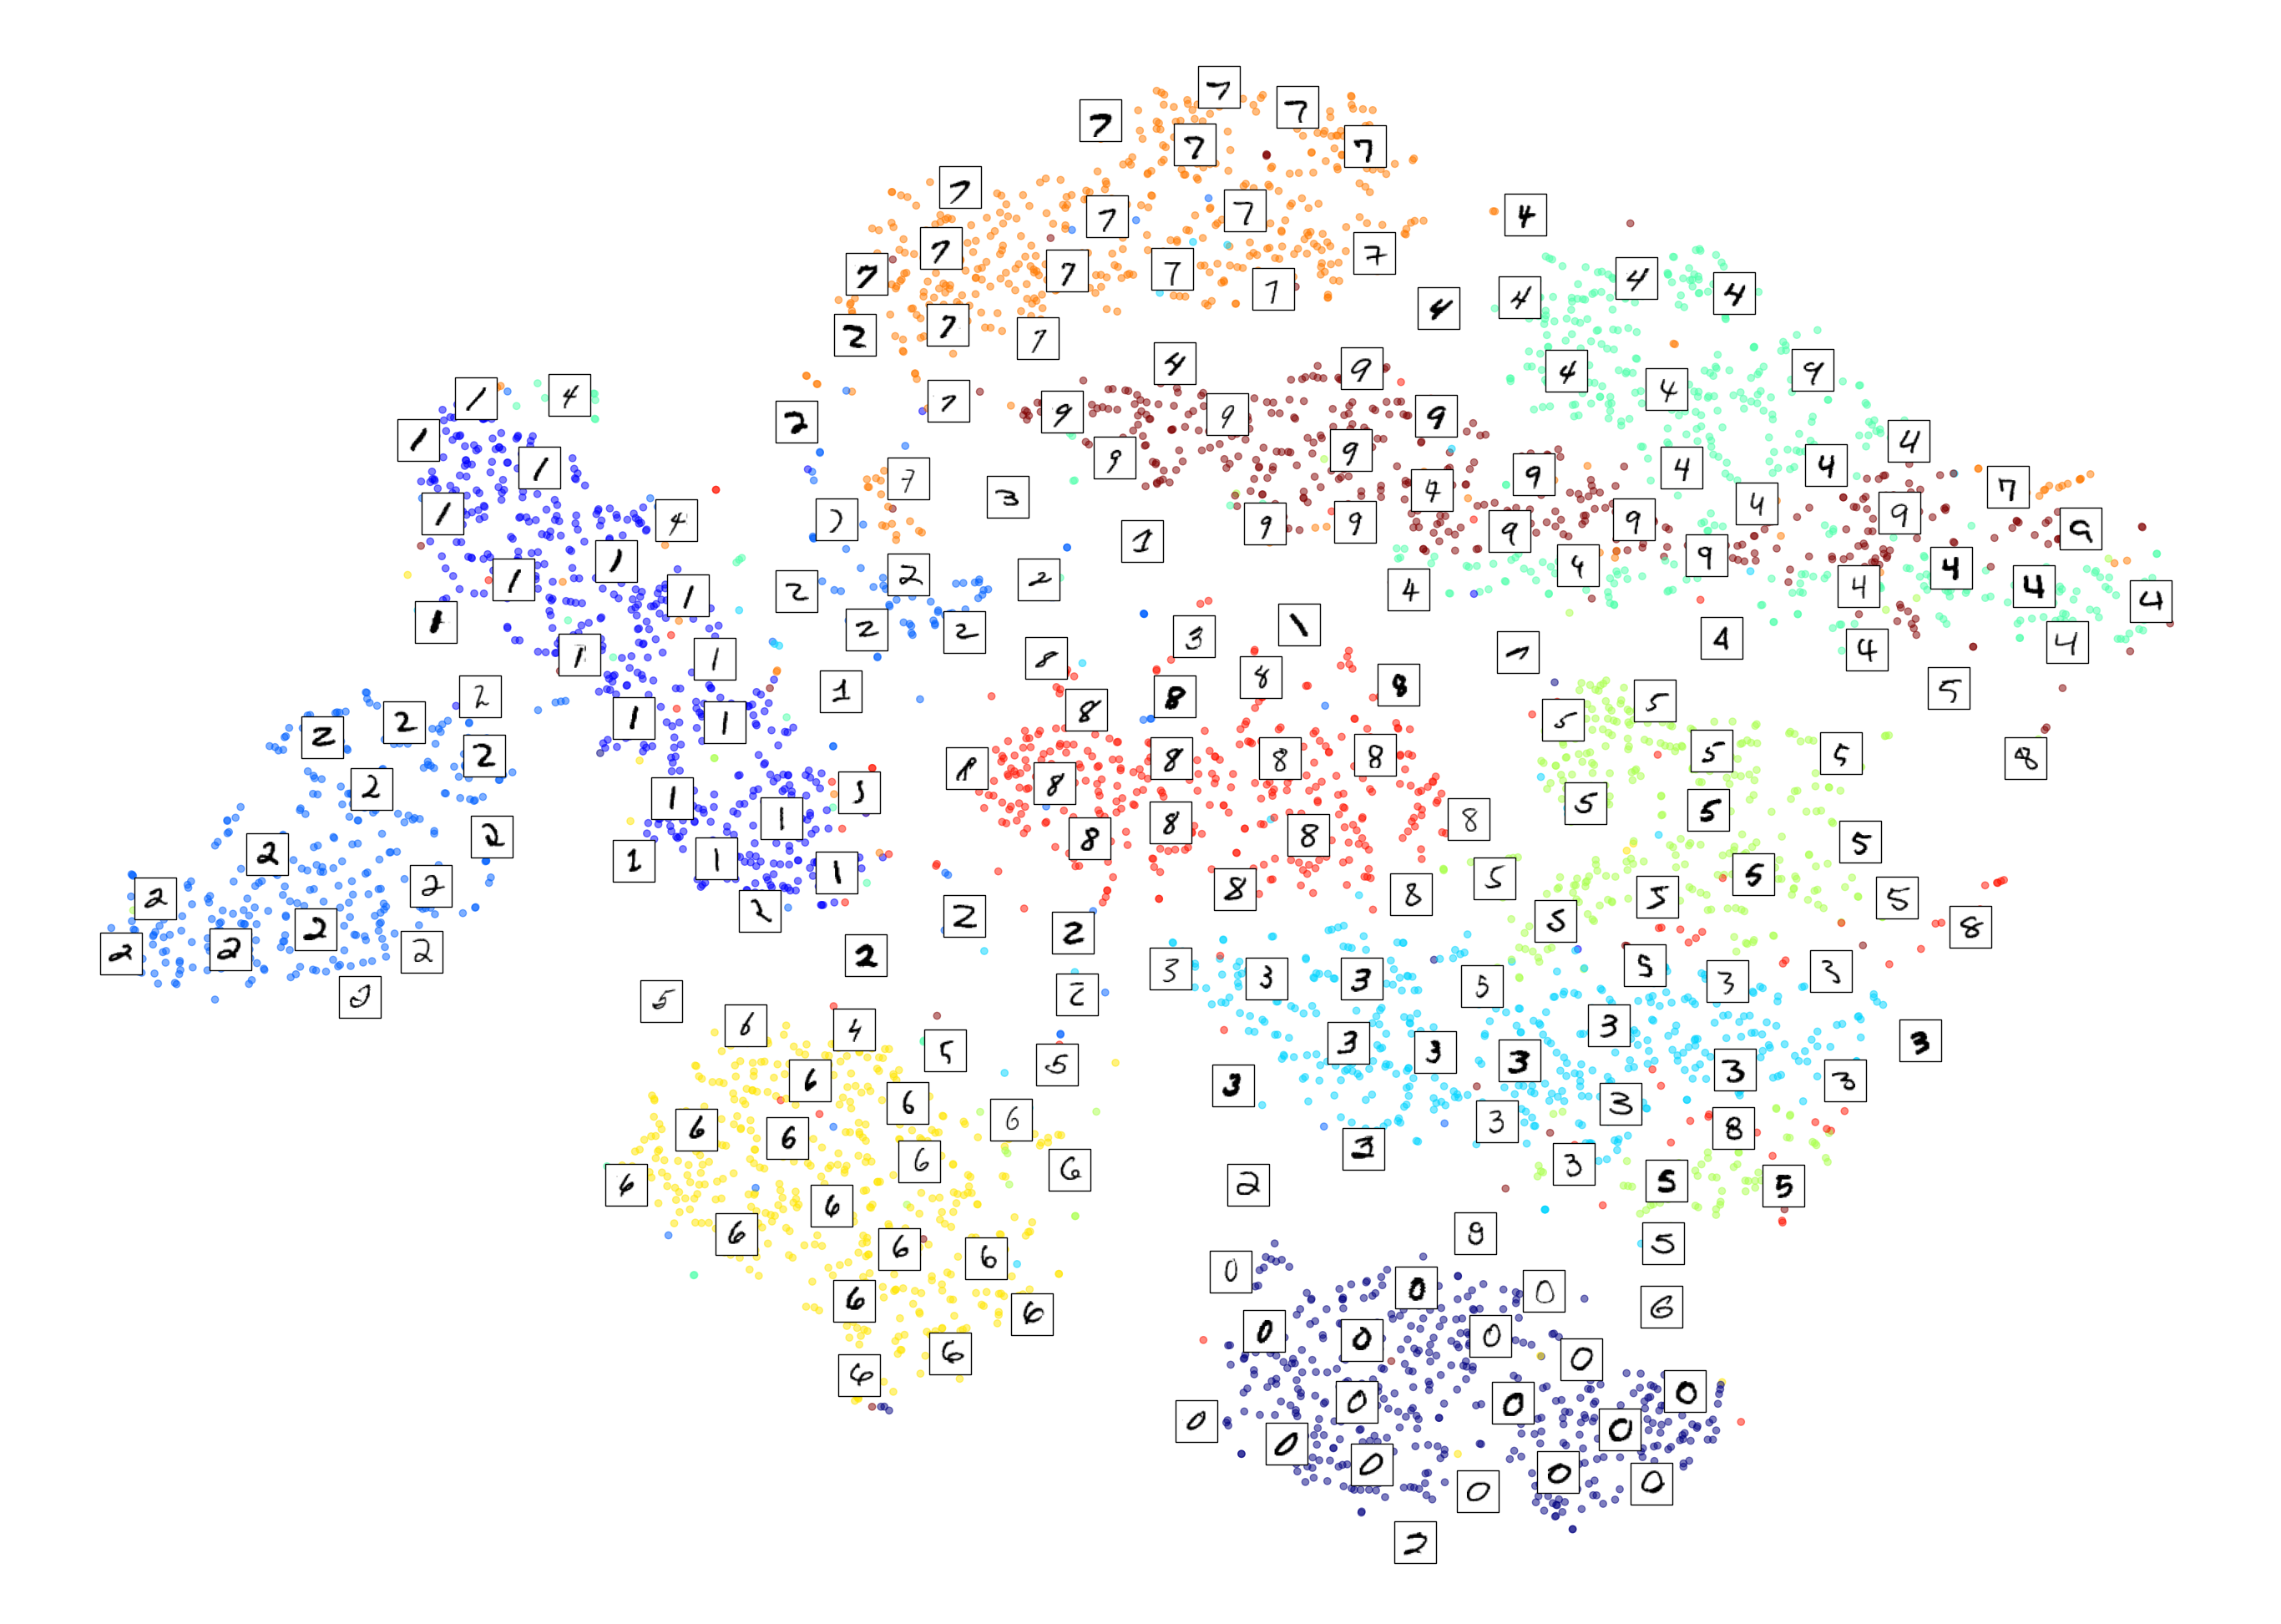

In [49]:
plot_digits(X_reduced, y, X, figsize= (35, 25))

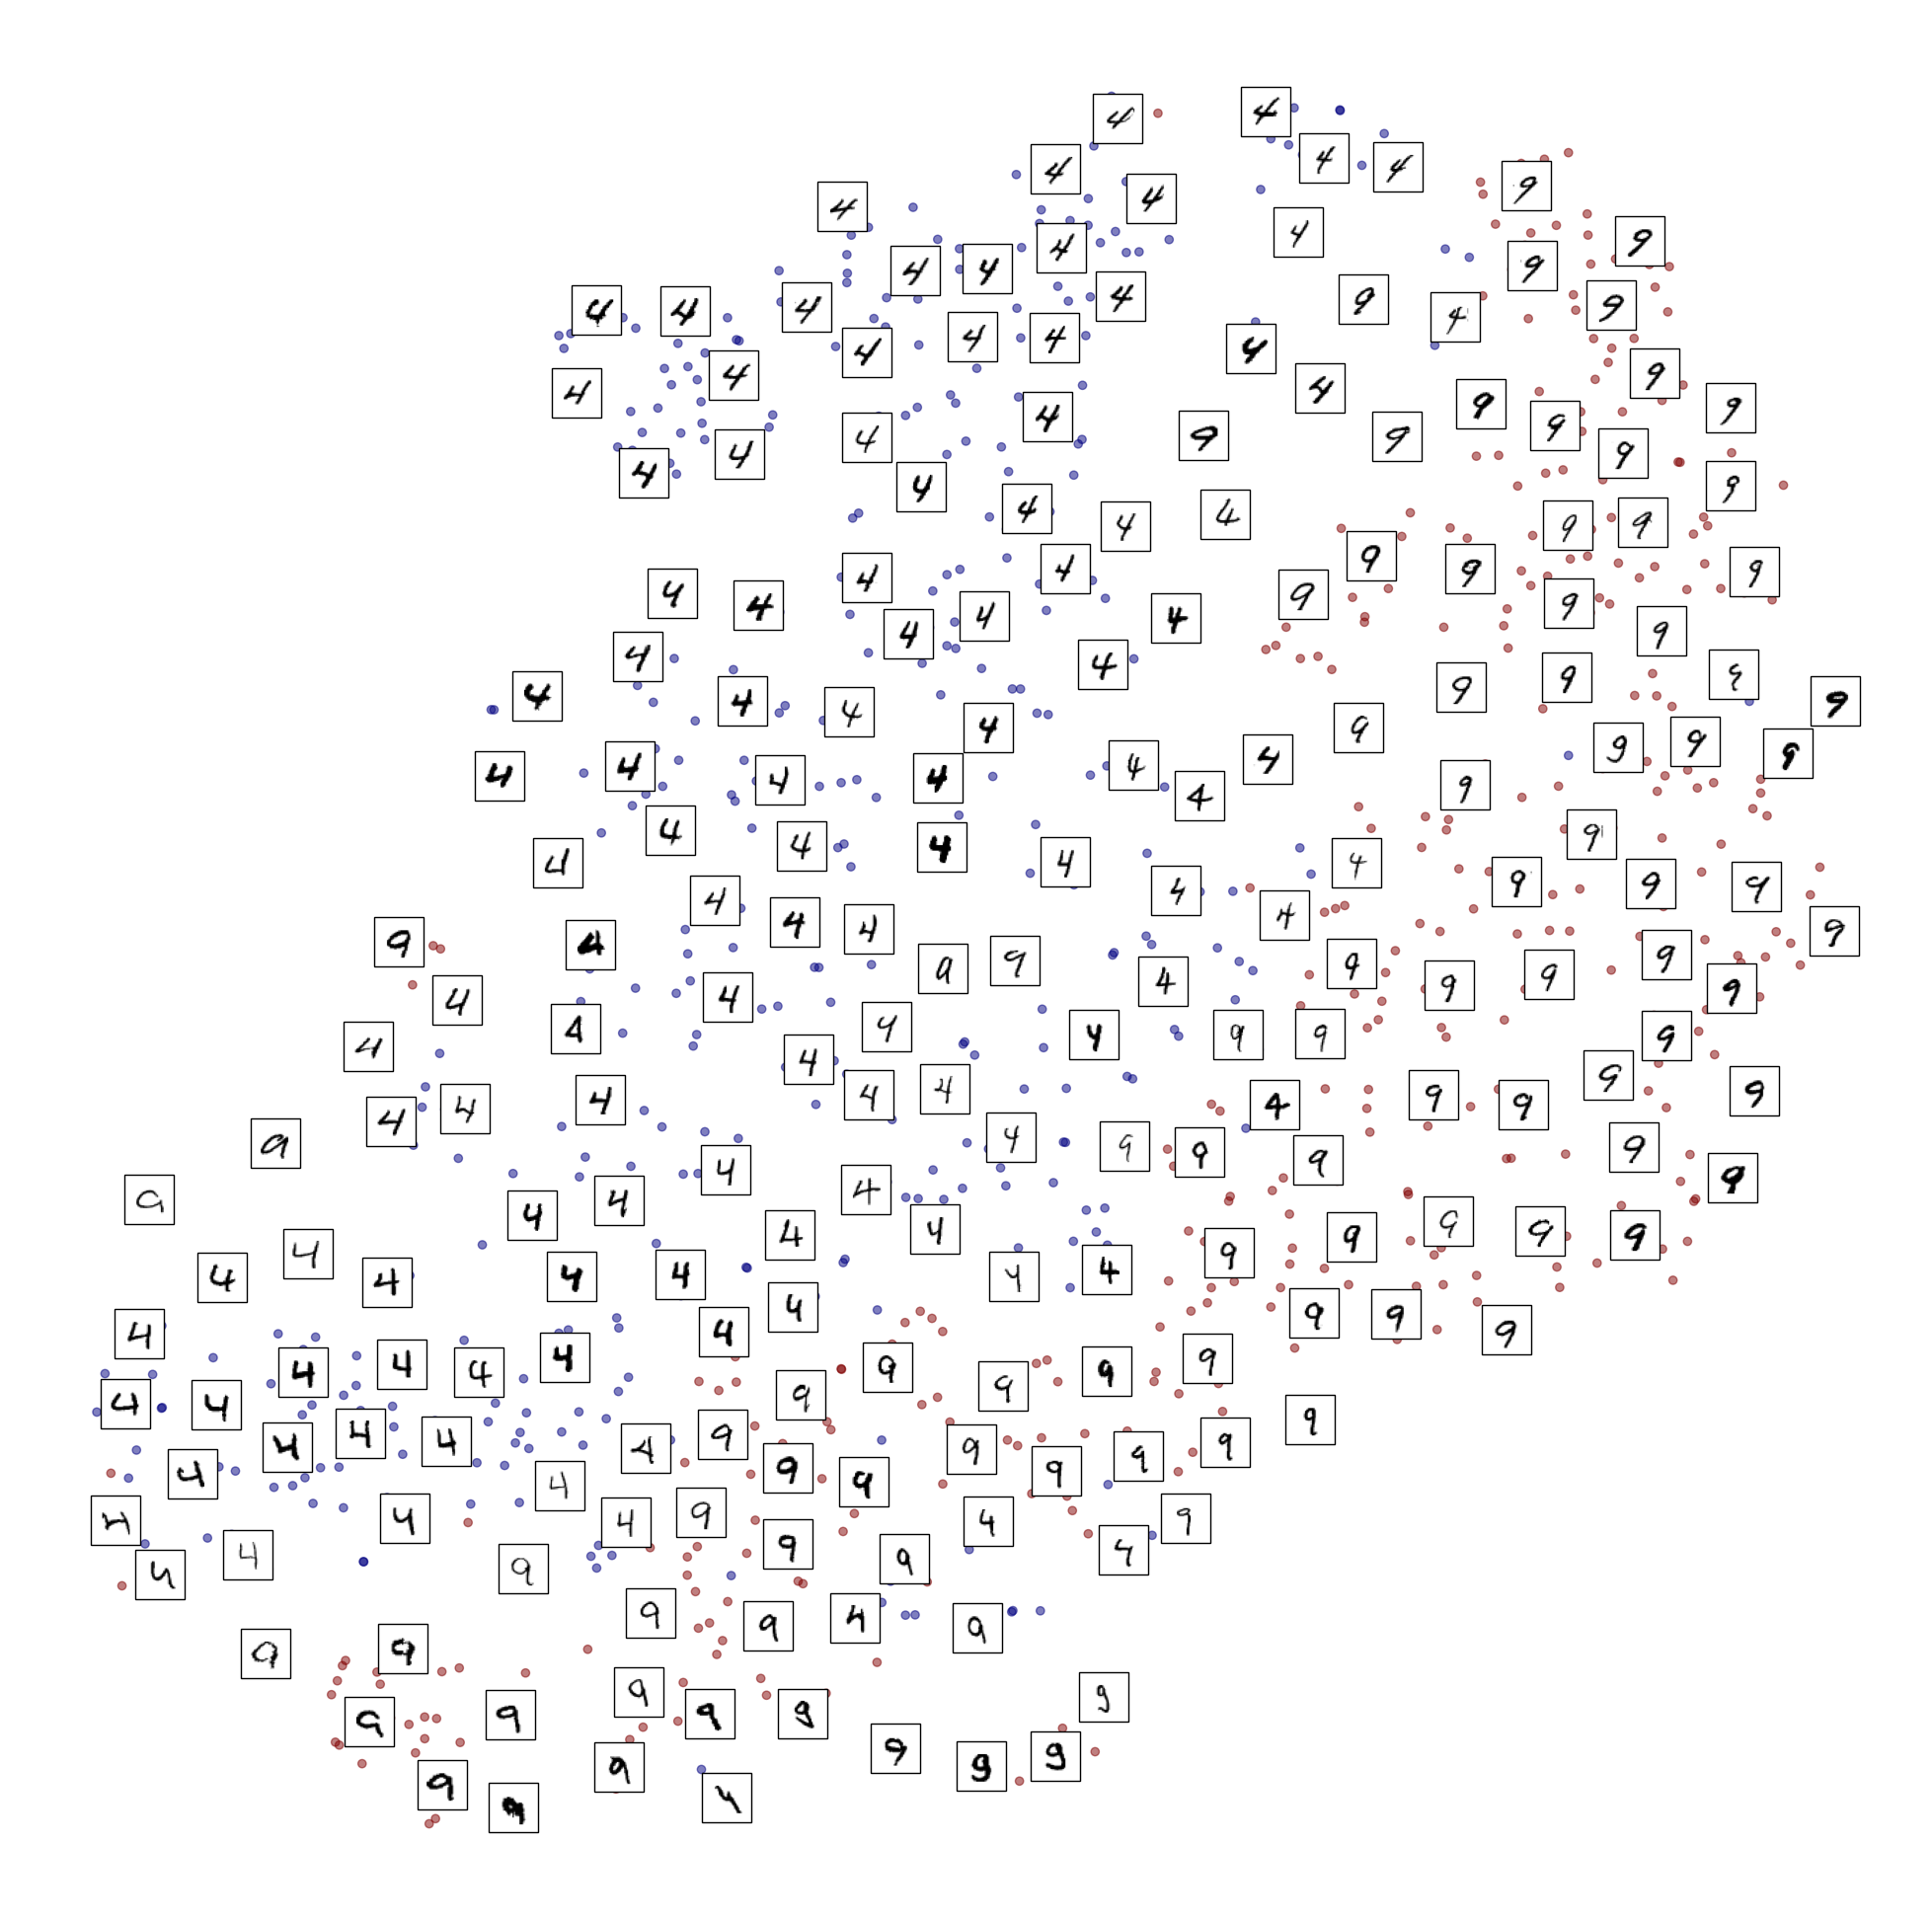

In [50]:
plot_digits(X_subset_reduced, y_subset, X_subset, figsize= (25, 25))

## Trying other algorithms

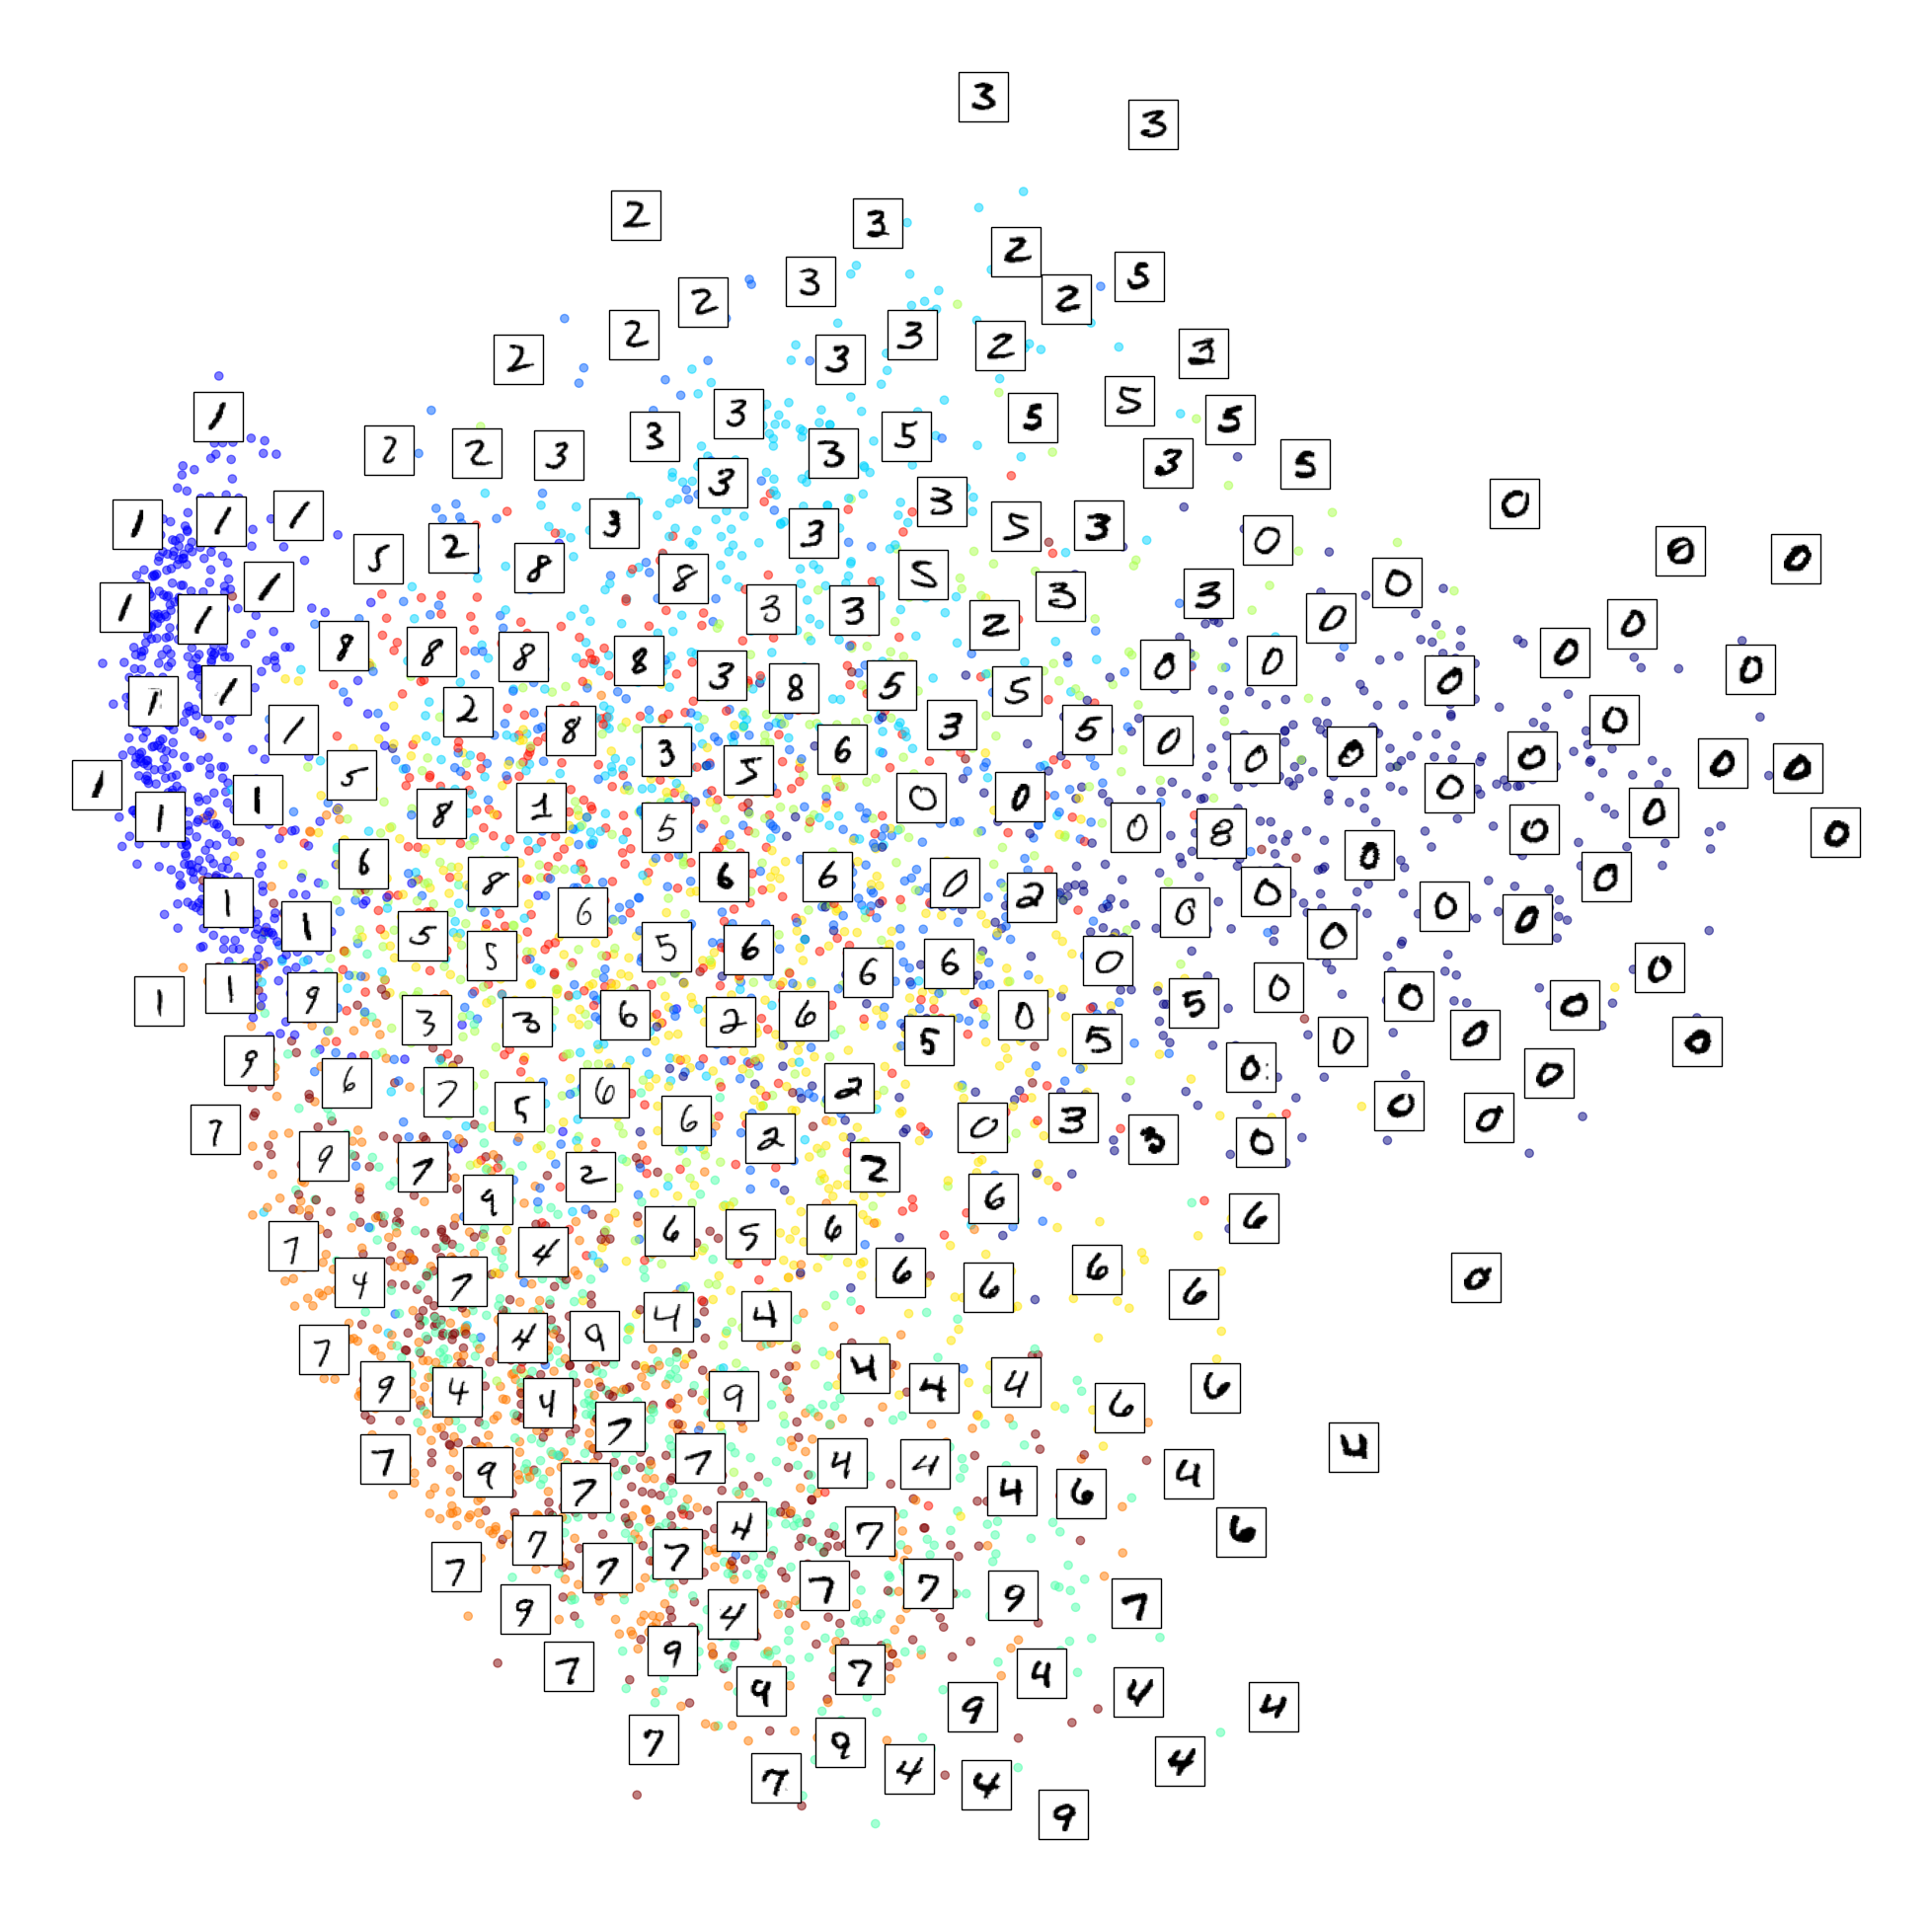

In [52]:
X_reduced_pca = PCA(n_components= 2, random_state= 42).fit_transform(X)
plot_digits(X_reduced_pca, y, X, figsize= (25, 25))

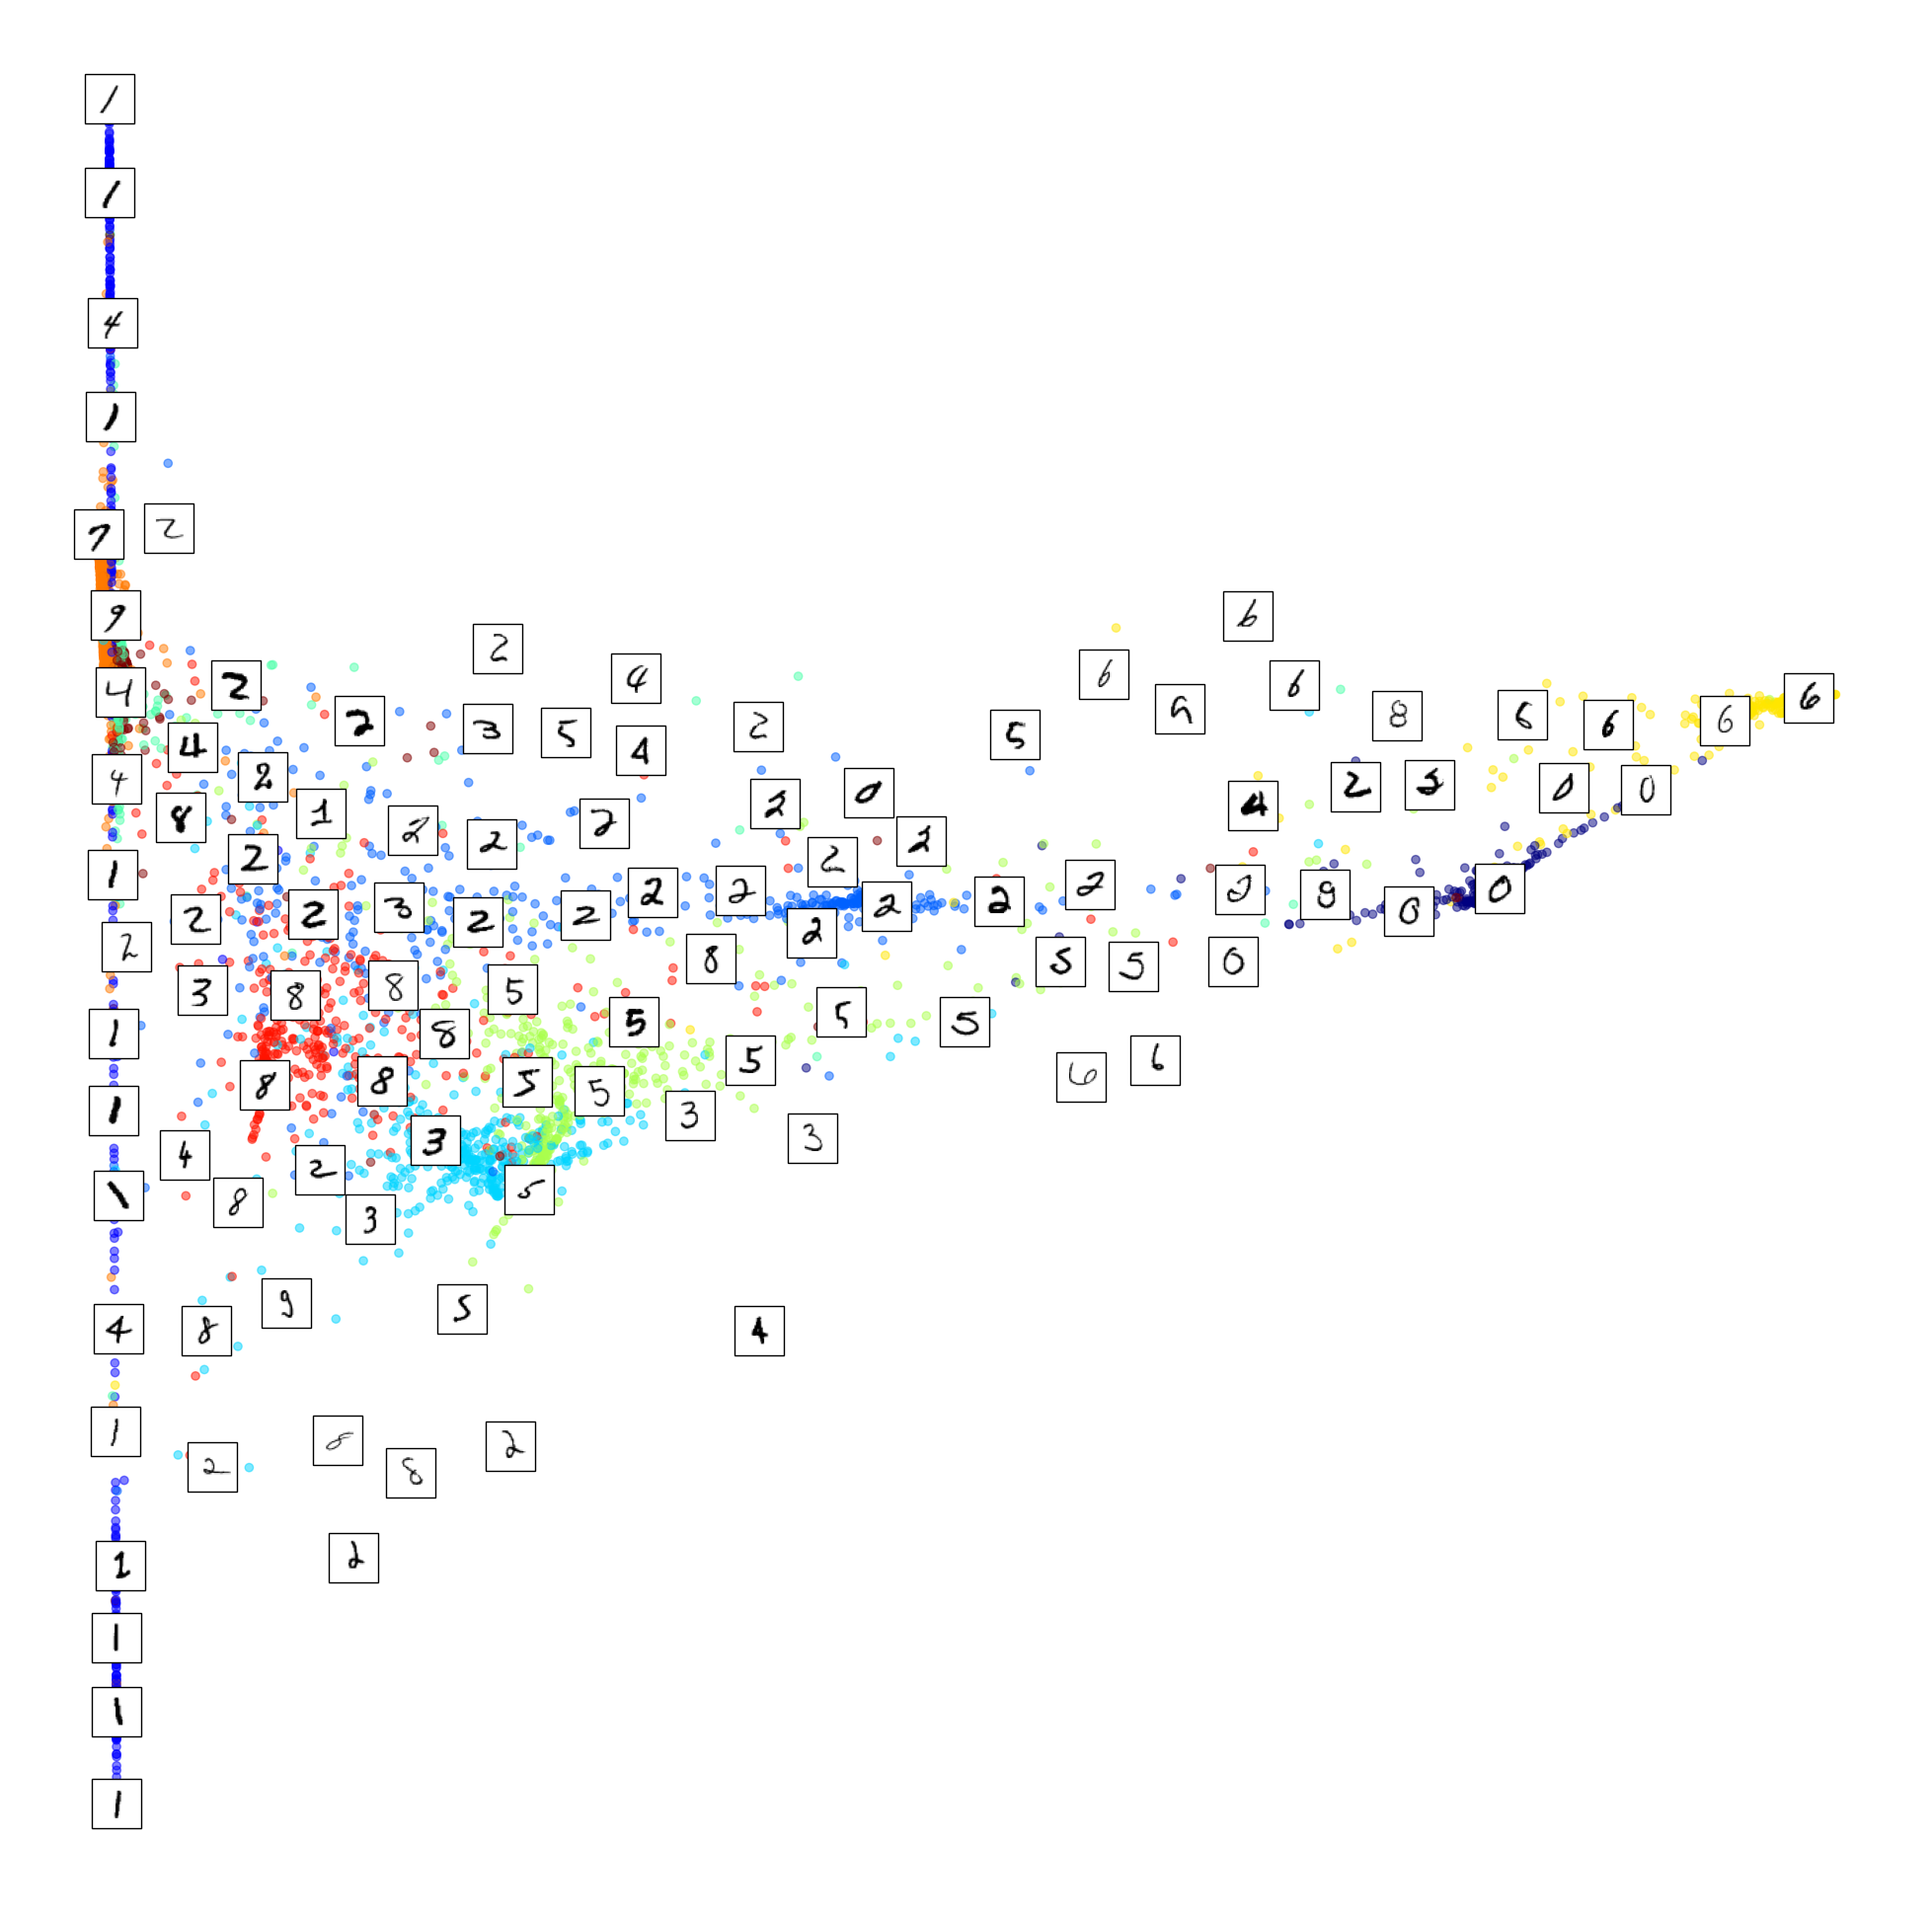

In [53]:
X_reduced_lle = LocallyLinearEmbedding(n_jobs= -1, random_state= 42).fit_transform(X)
plot_digits(X_reduced_lle, y, X, figsize= (25, 25))

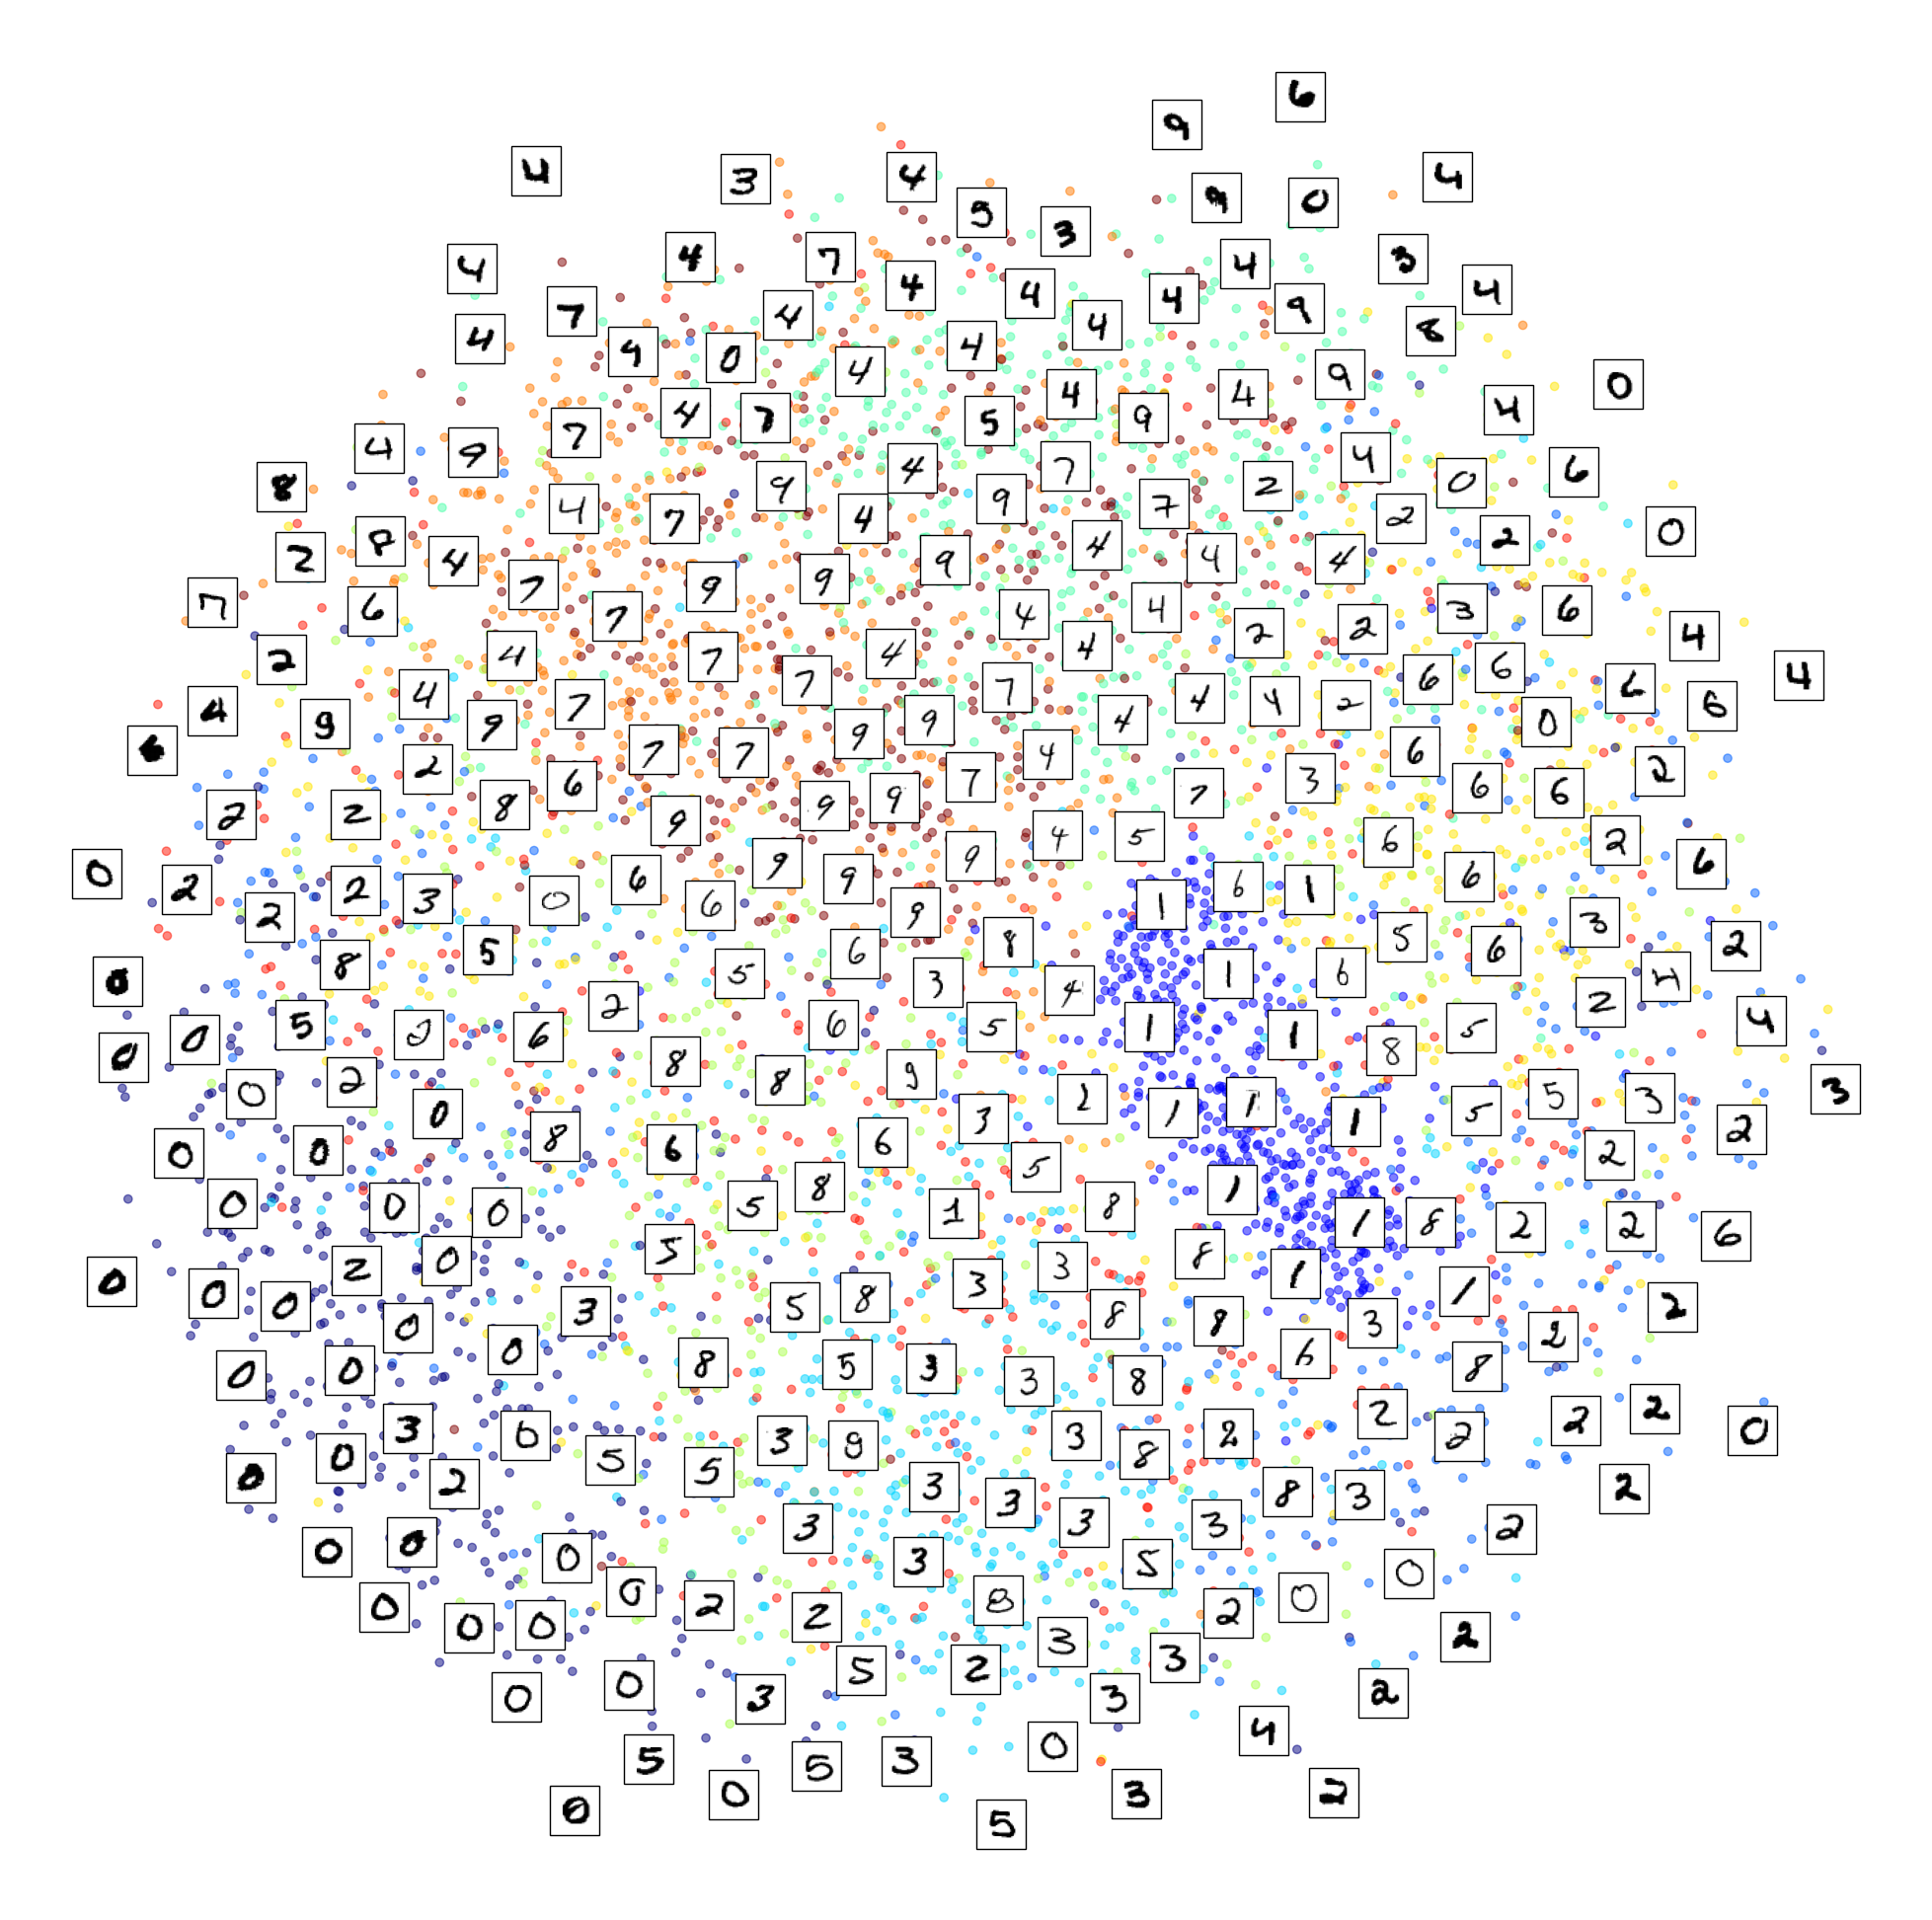

In [55]:
X_reduced_mds = MDS(normalized_stress= False, n_jobs= -1, random_state= 42).fit_transform(X)
plot_digits(X_reduced_mds, y, X, figsize= (25, 25))

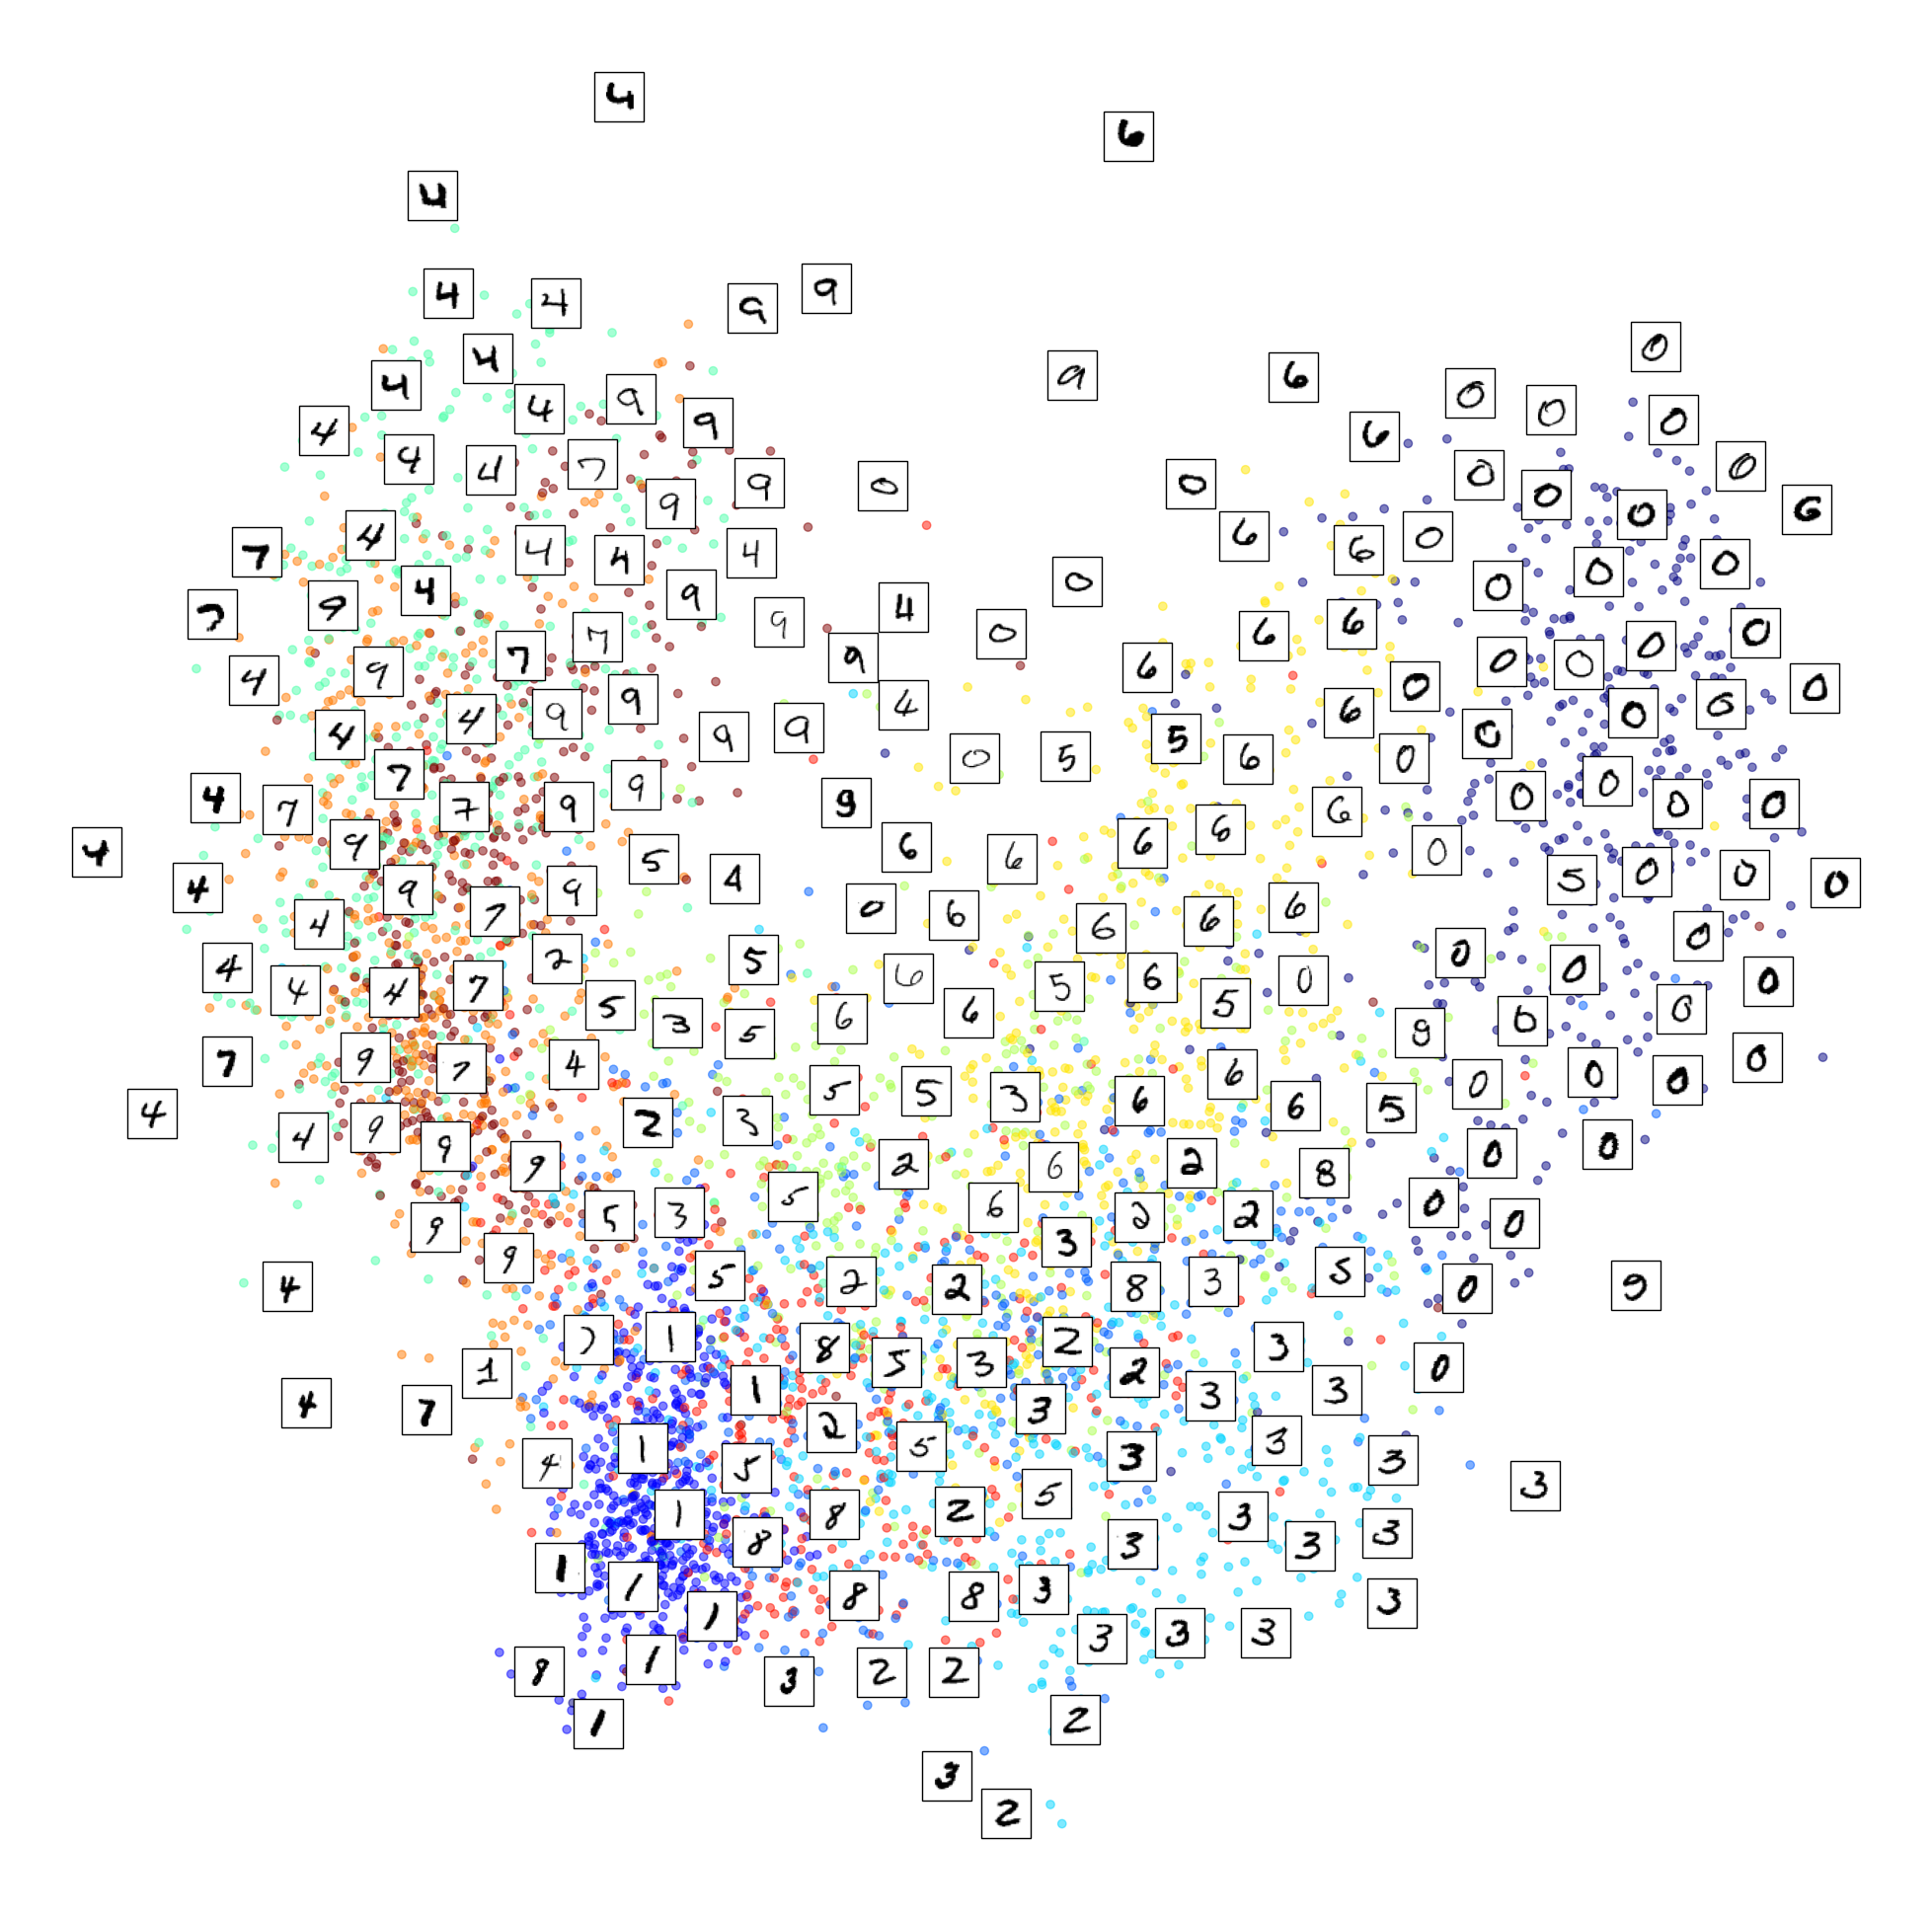

In [56]:
X_reduced_iso = Isomap(n_jobs= -1).fit_transform(X)
plot_digits(X_reduced_iso, y, X, figsize= (25, 25))

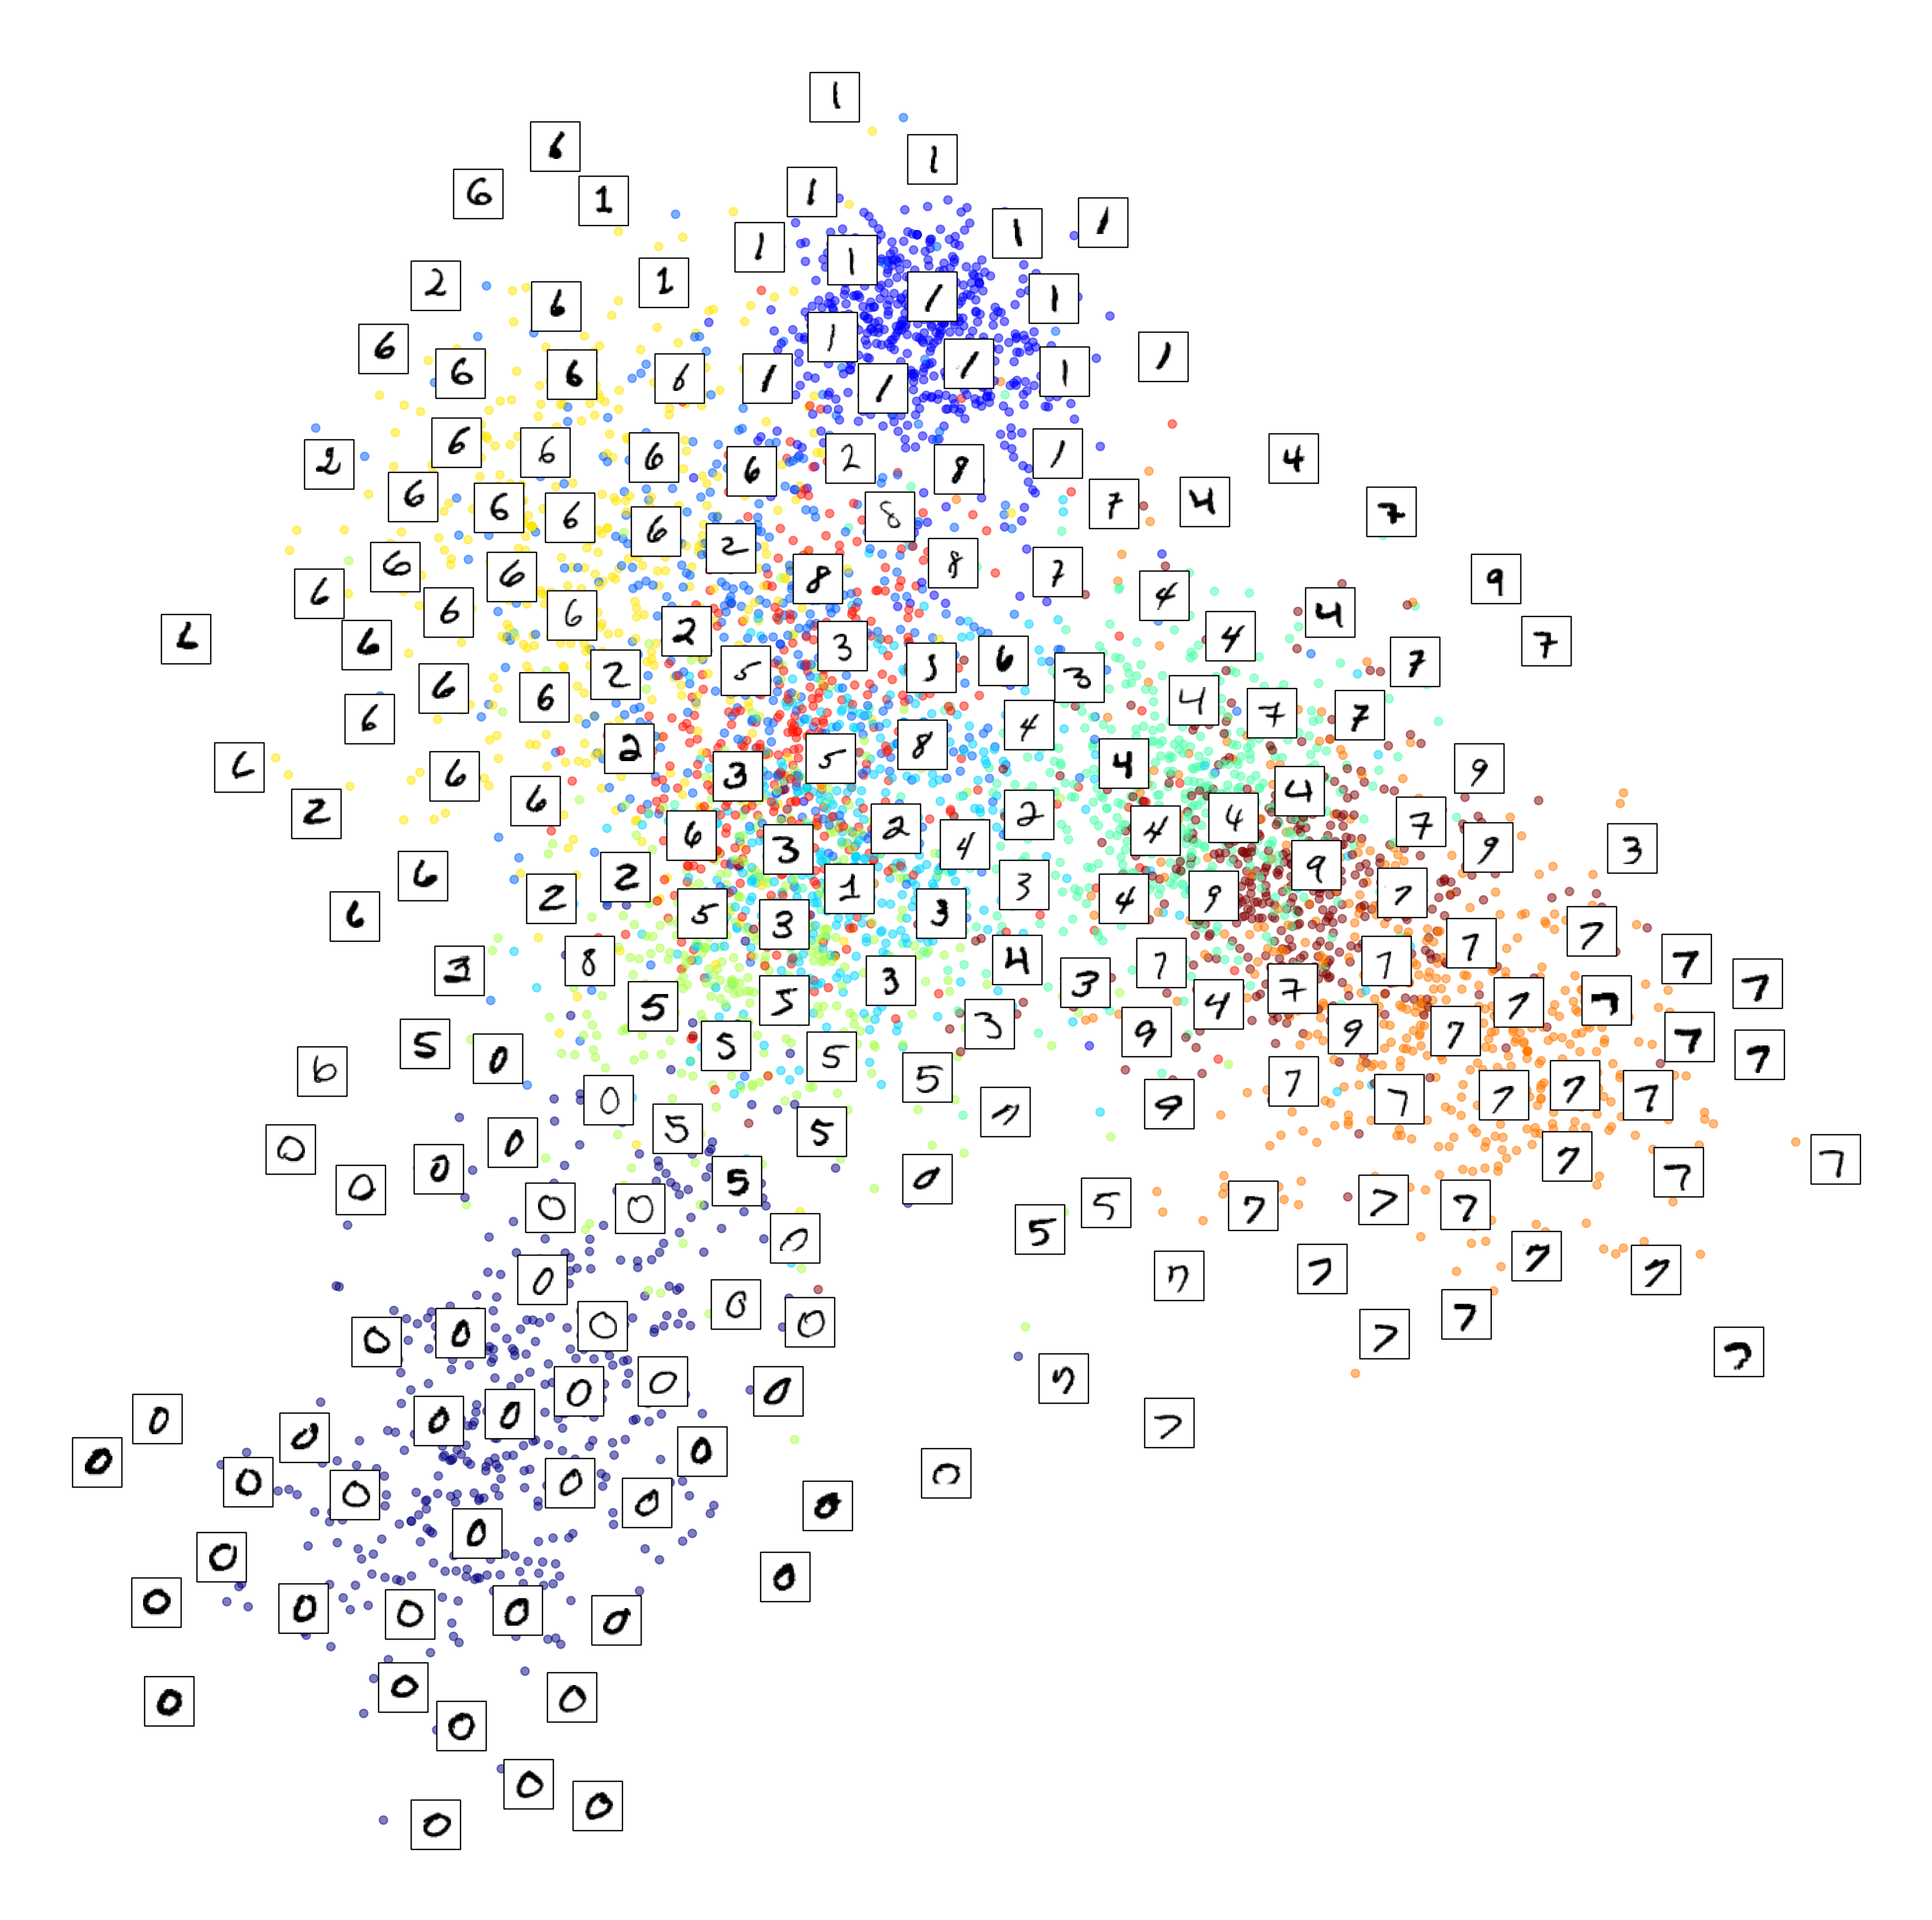

In [59]:
X_reduced_lda = LinearDiscriminantAnalysis(n_components= 2).fit_transform(X, y)
plot_digits(X_reduced_lda, y, X, figsize= (25, 25))

So we can clearly conclude that t-SNE is really good for data visualization in comparison to any other dimensionality reduction algorithm